<a href="https://colab.research.google.com/github/aquapathos/BasicAI/blob/master/IAI2_2%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリの読み込み

次のセルは実行しても何も起こりませんが、最初に1度必ず実行してください。2度実行する必要はありません。

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import numpy as np
import matplotlib.pyplot as plt
!pip -q install japanize-matplotlib
import japanize_matplotlib 

# 階層的クラスタリングの例

<img src="https://user-images.githubusercontent.com/5820803/128136705-5d2f4f43-a16e-4880-8e30-347b0284fbde.png" width=600>

データ 1,2,4,5,9,12,14,15 を最短距離を基準として階層的クラスタリングし、デンドログラムを描画するプログラムは次のように書けます。

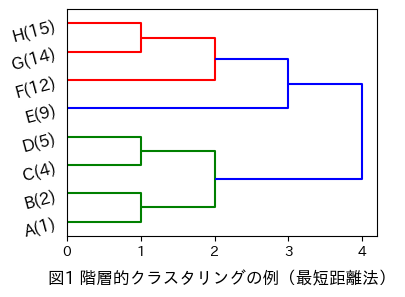

In [9]:
# データ定義
ラベル=["A(1)","B(2)","C(4)","D(5)","E(9)","F(12)","G(14)","H(15)"]
data=[[1],[2],[4],[5],[9],[12],[14],[15]]

# 階層的クラスタリングの実行
clusters = linkage(data,method='single') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(4, 3), dpi=100)
dendrogram(clusters,labels=ラベル,orientation='right',leaf_rotation=15, leaf_font_size=12)
plt.title("図1 階層的クラスタリングの例（最短距離法）", y=-0.25)
plt.savefig("fig1") # 結果画像の保存,

# 解説
## **linkage()**   階層的クラスタリングの実行
```
clusters = linkage(data,method='single')
```

この1行だけで階層的クラスタリングが実行できてしまいます。

### パラメータ
**data**  
データのリスト、もしくは距離配列（この演習では扱わないので説明略）

上の例は１次元のデータの場合ですが、多次元なら、[(3,4),(1,-4),...]、あるいは、[0,1,2],[2,1,5],...,] のような、リストのリストまたはタプルのリストの形にします。

**method** 
- 'single' : 　最短距離   
- 'complete' : 　最長距離   
- 'ward' :  ウォード法
- 'centroid' ： 重心法
- 'average' : 群平均
- 'median' : メディアン法   

が指定できます。

**返り値**    

リンケージマトリクスと呼ばれる、クラスタリング情報

変数 clusters を表示して、リンケージマトリクスを確認してみましょう。次のセルを実行してください。

In [10]:
clusters

array([[ 0.,  1.,  1.,  2.],
       [ 2.,  3.,  1.,  2.],
       [ 6.,  7.,  1.,  2.],
       [ 8.,  9.,  2.,  4.],
       [ 5., 10.,  2.,  3.],
       [ 4., 12.,  3.,  4.],
       [11., 13.,  4.,  8.]])

Nチームで行われるトーナメント試合は、全部で何試合でしょうか？　  
**答**　N-1試合です。優勝チーム以外は必ず１回負けるのですから、当然そうなります。

デンドログラムがトーナメント表のようになることから分かると思いますが、Ｎ個のデータをもとに階層的クラスタリングを実施すると、クラスタの統合はＮー１回発生します。先の例はデータが８個でしたから、統合は７回です。上の結果の7行は、その７回に対応しています。

```
[0., 1., 1., 2.]
```
を例に挙げて、意味を説明します。

最初の0，1は、０番のクラスタ(A)と１番のクラスタ(B)をまとめる、ということを表しています。

リストの３つ目の数字１は、それらの距離が１であったこと、最後の２は統合されてできたクラスタに含まれるデータの数が全部で２個であることを意味します。

統合されてできたクラスタには、８番～１４番まで、統合順に連番がつけられます。（もし、元のデータが10個なら10番からです）

８番[ 0.,  1.,  1.,  2.]　A（0番）とB（1番）をまとめたクラスタ、距離は１  
９番[ 2.,  3.,  1.,  2.]　C（2番）とD（3番）をまとめたクラスタ、距離は１  
10番[ 6.,  7.,  1.,  2.]　G（6番）とH（7番）をまとめたクラスタ、距離は１   
11番[ 8.,  9.,  2.,  4.]　AB（8番）とCD（9番）をまとめたクラスタ、距離は２   
12番[ 5., 10.,  2.,  3.]　F（5番）とGH(10番）をまとめたクラスタ、距離は２   
13番[ 4., 12.,  3.,  4.]　E（4番）とFGH(12番）をまとめたクラスタ、距離は３   
14番[11., 13.,  4.,  8.]　ACBD（11番）とEFGH(13番）まとめたクラスタ、距離は４   


# **dendrogram()** デンドログラムの描画

```
dendrogram(clusters,labels=ラベル,orientation='right',leaf_rotation=15, leaf_font_size=12)
```

#### パラメータ
**clusters**  リンケージマトリクス  

**labels**  デンドログラムに表示するデータラベル  省略した場合は連番

**orientation** デンドログラムの描画方向 　top, bottom, right, left が選べる。省略した場合は top。

**leaf_rotation** ラベルの描画角度　単位は 度数（省略可）

**leaf_font_size**  フォントサイズ（省略可）

**color_threshold**  色分けのしきい値　省略した場合は最大値の70% 


# 別の例


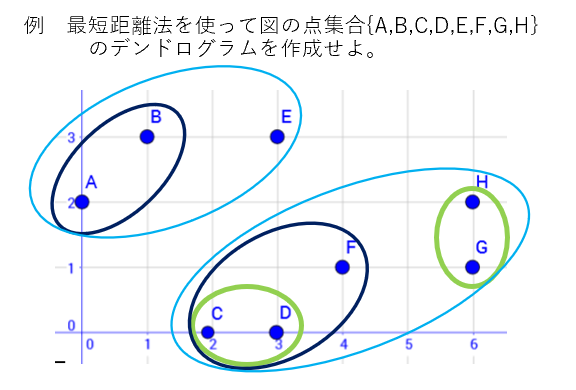


講義で出てきた階層的クラスタリングの例題をプログラムでやってみましょう。



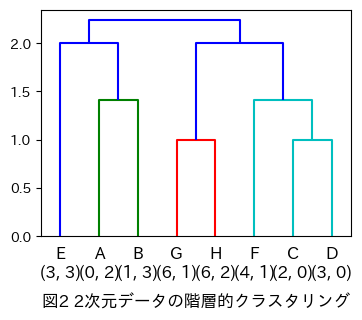

In [11]:
# データ定義
data=[(0,2),(1,3),(2,0),(3,0),(3,3),(4,1),(6,1),(6,2)]
ラベル=[l+"\n"+str(d) for l,d in zip("ABCDEFGH",data)]

# 階層的クラスタリングの実行
clusters = linkage(data,method='single') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(4, 3), dpi=100)
dendrogram(clusters,labels=ラベル)
plt.title("図2 2次元データの階層的クラスタリング", y=-0.35)
plt.savefig("fig2") # 結果画像の保存,

クラスタリング結果を確認しておきます。

In [12]:
clusters

array([[ 2.        ,  3.        ,  1.        ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 5.        ,  8.        ,  1.41421356,  3.        ],
       [ 4.        , 10.        ,  2.        ,  3.        ],
       [ 9.        , 11.        ,  2.        ,  5.        ],
       [12.        , 13.        ,  2.23606798,  8.        ]])

$1.414=\sqrt2, \hspace{5mm} 2.236=\sqrt5$です。デンドログラムの横棒の高さが距離と一致するように描かれていることを確認してください。

# 練習　
(1) 重心法(method=**centroid**)を使ってD={0,2,5,9,12,14} のデンドログラムを作成しなさい。  
(2) 二次元平面上に {(0,0), (0,1), (0,2),(4,0), (4,1), (4,2)}の６点の点集合がある． これらの点をウォード法(method=**ward**) を使って階層クラスタリングせよ。


# 応用

添付ファイル、**jinkodata.csv** をアップロードしてください。

In [13]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving jinkodata.csv to jinkodata.csv


In [14]:
file_name = list(uploaded.keys())[0]
# df_raw = pd.read_csv(file_name, delimiter=",", encoding="cp932",index_col=0)  # Windows版 Excelなど、 Shift-JISコードの csv ファイルの場合
df_raw = pd.read_csv(file_name, delimiter=",", encoding="utf-8",index_col=0)  # UTF- csvファイルの場合
df_raw.head(10) # データの上から10個を表示

,人口,面積,人口密度
都道府県,,,
北海道,5228885,78421,67
青森県,1238730,9646,128
岩手県,1211206,15275,79
宮城県,2303487,7282,316
秋田県,960113,11638,83
山形県,1068696,9323,115
福島県,1834198,13784,133
茨城県,2868554,6097,470
栃木県,1934016,6408,302


個別の項目でのクラスタリング

データの３つの属性、「人口」「面積」「人口密度」をそれぞれ単独で使ってクラスタリングしてみます。



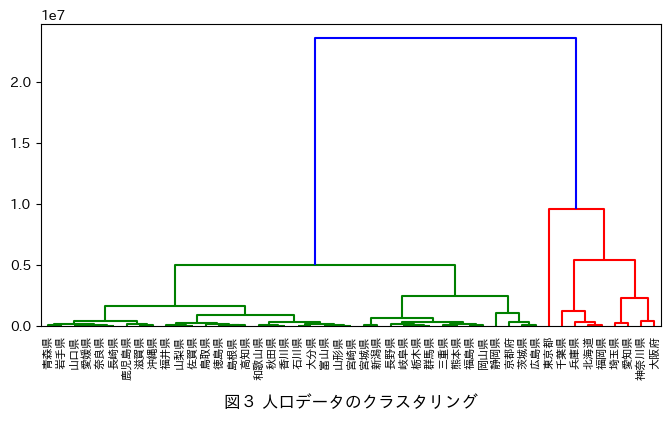

In [15]:
# 人口による階層的クラスタリング
data = df_raw[['人口']] # クラスタリング対象データ
ラベル = df_raw.index # 都道府県名

# 階層的クラスタリングの実行
clusters = linkage(data,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(8, 4), dpi=100)
dendrogram(clusters,labels=np.array(ラベル),orientation='top',leaf_font_size=8)
plt.title("図３ 人口データのクラスタリング", y=-0.3)
plt.savefig("fig3") # 結果画像の保存,

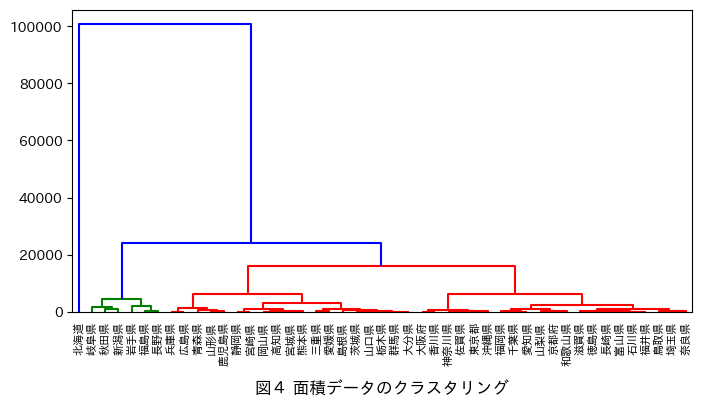

In [16]:
# 面積による階層的クラスタリング
data = df_raw[['面積']] # クラスタリング対象データ
ラベル = df_raw.index # 都道府県名

# 階層的クラスタリングの実行
clusters = linkage(data,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(8, 4), dpi=100)
dendrogram(clusters,labels=np.array(ラベル),orientation='top',leaf_font_size=8,color_threshold=20000)
plt.title("図４ 面積データのクラスタリング", y=-0.3)
plt.savefig("fig4") # 結果画像の保存,

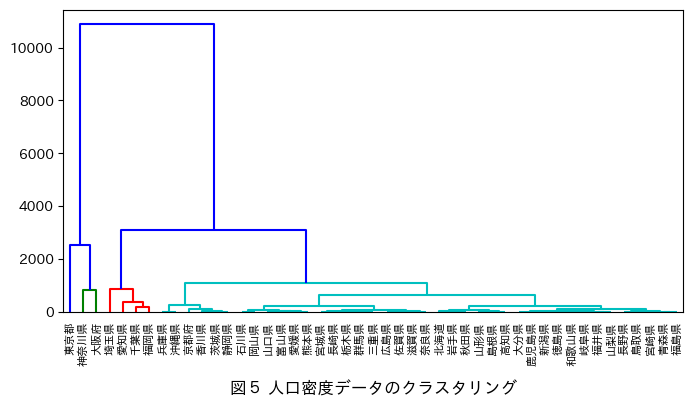

In [17]:
# 人口密度による階層的クラスタリング
data = df_raw[['人口密度']] # クラスタリング対象データ
ラベル = df_raw.index # 都道府県名

# 階層的クラスタリングの実行
clusters = linkage(data,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(8, 4), dpi=100)
dendrogram(clusters,labels=np.array(ラベル),orientation='top',leaf_font_size=8,color_threshold=2000)
plt.title("図５ 人口密度データのクラスタリング", y=-0.3)
plt.savefig("fig5") # 結果画像の保存,

# 結果の分析
（１）「人口」によるクラスタ分析

<img src="https://user-images.githubusercontent.com/5820803/128314305-4fcc582d-6be3-4771-ac35-ec27807457c2.png" width=600>

結果としてできたクラスタ階層は、データを大きく２つ分けると、「東京、千葉、兵庫、北海道、福岡、埼玉、愛知、神奈川、大阪」（赤色）とそれ以外の府県（緑色）に分かれるということを示しています。

赤字はわれわれの、”大都市圏を要する都道府県”の概念にきれいに一致しています。

（２）「面積」によるクラスタ分析

<img src="https://user-images.githubusercontent.com/5820803/128317733-ff8ba0a4-97fb-4619-a84f-7ad4224f1a54.png" width=300>

「都道府県では、北海道の面積が突出している」という常識通り、もっとも上のレベルでは、北海道とそれ以外というクラスタ分けができています。次のレベルでは、北海道以外が「岐阜、秋田、新潟、岩手、福島、長野」とそれ以外にクラスタ分けされており、ここに上がっている６県が北海道以外では、面積上位であることがわかります。

(３)「人口密度」によるクラスタ分析

人口密度では、やはり東京、大阪、神奈川が他とは一線を画しており、この3都府県では東京が１段上であることがわかります。その次に、「埼玉、愛知、千葉、福岡」の４県が続きます。人口で上位クラスタにランキングしていた北海道と兵庫が人口密度では上位に挙がっていないので、この両県は人口も多いが、面積が大きいのだということが分かります。

## 「人口、面積」RAWデータでのクラスタリング

次に属性データの組み合わせでクラスタリングしてみる。「人口密度」は「人口」と「面積」と独立ではないので除外し、「人口」と「面積」の素データのペアをクラスタリングしてみます。



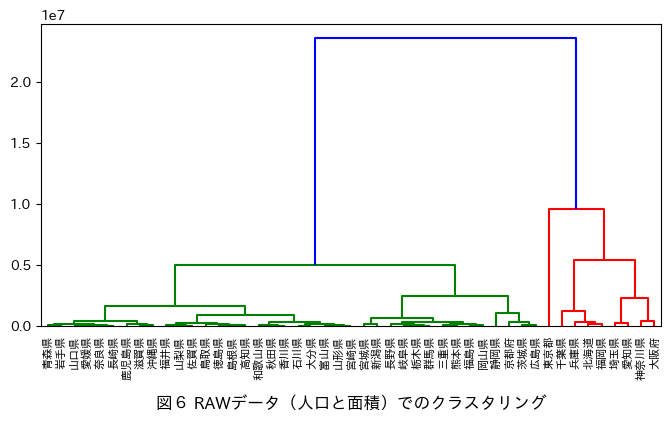

In [18]:
# RAWデータのままでの階層的クラスタリング
data = df_raw[['人口','面積']]  # クラスタリング対象データ
ラベル = df_raw.index # 都道府県名

# 階層的クラスタリングの実行
clusters = linkage(data,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(8, 4), dpi=100)
dendrogram(clusters,labels=np.array(ラベル),orientation='top',leaf_font_size=8,color_threshold=1e7)
plt.title("図６ RAWデータ（人口と面積）でのクラスタリング", y=-0.3)
plt.savefig("fig") # 結果画像の保存,

結果は、人口のみでの結果と非常に類似しています。これは、人口のデータの桁数が、面積と比べて３桁ほど大きいため、ほぼ人口だけで結果が決まってしまうからです。

# データの標準化

属性間の尺度の違いを吸収し、比較尺度として対等にするために、各属性値を平均０、標準偏差が１になるように変換することを、**標準化**と言います。

次のプログラムにより、データセット df_raw から標準化したデータセット df_std を生成することができます。実行してみてください。

In [19]:
# データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_raw)
df_std = pd.DataFrame( data=sc.transform(df_raw), index=df_raw.index,columns=df_raw.columns)

# 標準化したデータセットにもとづくクラスタリング

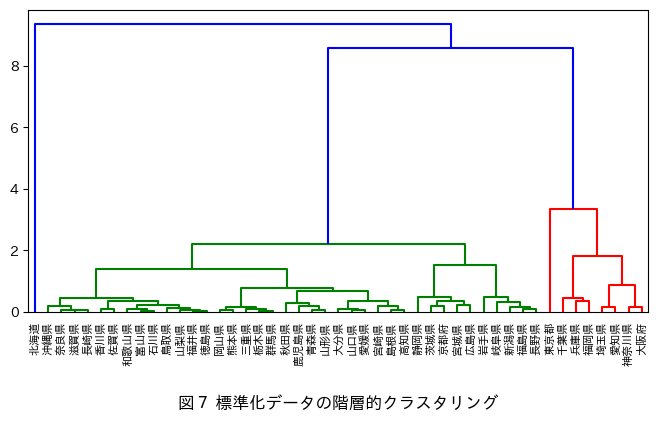

In [20]:
data = df_std[['人口','面積']] # クラスタリング対象データ
ラベル = df_raw.index # 都道府県名

# 階層的クラスタリングの実行
clusters = linkage(data,method='ward') # 'single' # single:最短距離,  ward:ウォード法、centroid:重心法

# 描画
plt.figure(num=None, figsize=(8, 4), dpi=100)
dendrogram(clusters,labels=np.array(ラベル),orientation='top')
plt.title("図７ 標準化データの階層的クラスタリング", y=-0.35)
plt.savefig("fig7") # 結果画像の保存,

# 標準化データのクラスタリング結果の分析

(1) トップレベルの２クラスタ分割では、北海道とそれ以外という分割となっている。
東京の人口の突出度よりも、北海道の面積の突出度の方がより大きいということを意味する。
(2) 次の階層では、いわゆる大都市圏を持つ都道府県「東京、大阪、神奈川、愛知、埼玉、千葉、兵庫、福岡」とそれ以外という分割が起こっている。

(3) 残りの府県では、右のほうに「岩手、岐阜、新潟、福島、長野」というクラスタがあるが、これは比較的面積の多い県のクラスタであろう。




# <font color='red'>課題</font>

「人口・面積・人口密度」のデータを使ったクラスタ解析を真似て、自分で選んだデータを使ってクラスタ解析を行ってみてください。

## 手順
(1) ネット上から任意の統計データを入手し、Excel でデータ用の csv ファイルを作る。手順が分からない人は、 [オープンな統計データの利用](https://drive.google.com/file/d/1KiTaNOg5Z7c3WStqRqA-kGMTOrOAe-5J/view) を参考にしてください。    
(2) 属性を２つ選んで、それぞれの属性で階層的クラスタリングを実行しましょう。    
(3) データの標準化を行い、複数の属性の組み合わせで階層的クラスタリングを実行してみてください。    
(4) 以上の結果をレポートにまとめて提出してください。    
- データの内容、入手先を記載。
- どのようなデータなのか、先頭から数個ぐらいはレポートに記載する。
- クラスタリング結果の画像、何を基準にしたのかをきちんと記述すること。
- 分析、考察




--- 
以下に k-means 法を使った分析の例を紹介しておきます。

# k平均法

同じデータを、k平均法でクラスタリングしてみます。以下のプログラムを実行していてください。

In [21]:
from sklearn.cluster import KMeans

# データ定義
df=df_std[['面積','人口']]
data = df
dx,dy= np.array(df['面積']),np.array(df['人口'])

# k-means 法実行メソッド　 ｋ:　クラス数、 itr: クラスタ更新回数  
cols = ["green","blue","orange","purple","red"]
def go(k,itr):
    global result
    km = KMeans(n_clusters=k,init='random',n_init=1,max_iter=itr,random_state=1,precompute_distances=False)
    result = km.fit(data)
    # fig = plt.figure()
    plt.figure(num=None, figsize=(8, 6), dpi=100)
    plt.gca().set_aspect('equal')
    print(u"クラスタ重心\n",np.round([km.cluster_centers_[:,0],km.cluster_centers_[:,1]],2))
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X',c='black')
    for i,(x,y,s) in enumerate(zip(dx,dy,df_raw.index)):
        plt.text(x-0.1,y+0.1,s,c=cols[result.labels_[i]],fontsize=6)
    plt.scatter(dx[result.labels_==0.0], dy[result.labels_==0.0], marker = '.',c="green")
    plt.scatter(dx[result.labels_==1.0], dy[result.labels_==1.0], marker = '.',c="blue")
    plt.scatter(dx[result.labels_==2.0], dy[result.labels_==2.0],marker = '.',c="orange")
    plt.scatter(dx[result.labels_==3.0], dy[result.labels_==3.0],marker = '.',c="purple")
    plt.scatter(dx[result.labels_==4.0], dy[result.labels_==4.0],marker = '.',c="red") 
    plt.ylabel("人口")
    plt.xlabel("面積")
    plt.show()
    return km

## k=3 （3クラスタへの分割）

k-平均法は、漸近的にクラスタを最適化していく方法ですので、繰り返しが必要になります。

上で定義した関数 **go(k,itr)** は、k が指定クラスタ数、itr が最大繰り返し回数です。本当は適当に大きな数を itr で指定して、一発で結果が出るのですが、k平均法の動作を理解するために、itr を１ずつ大きくしていって、分割状態の変化を観察してみます。

クラスタ重心
 [[-0.19  0.97 -0.26]
 [ 0.51  0.43 -0.6 ]]


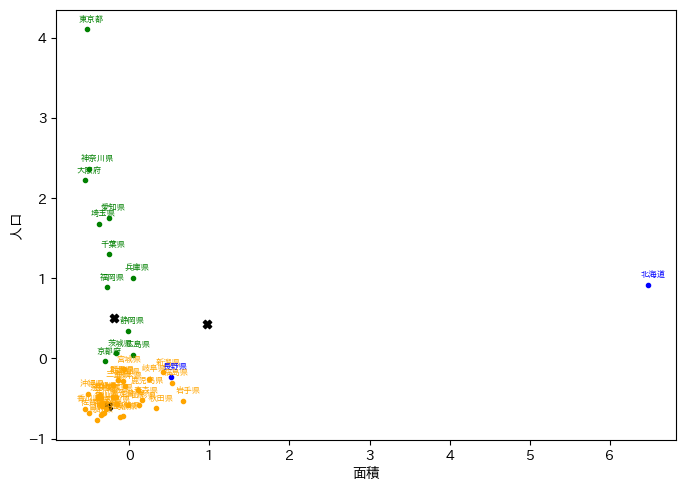

クラスタ重心
 [[-0.26  3.5  -0.12]
 [ 1.31  0.34 -0.5 ]]


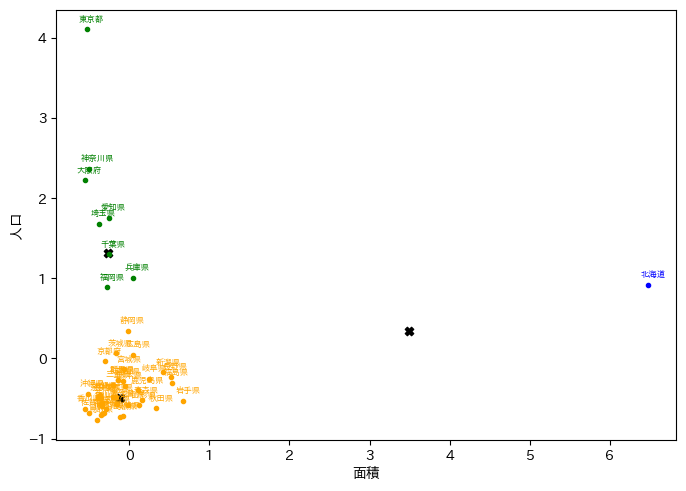

クラスタ重心
 [[-0.34  6.48 -0.1 ]
 [ 1.92  0.92 -0.43]]


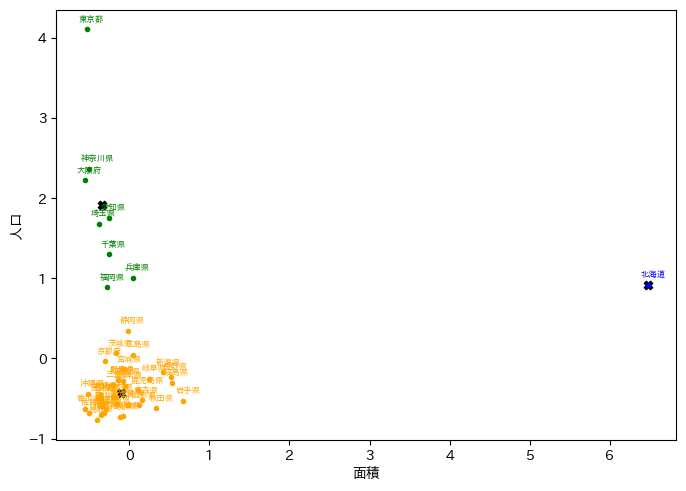

In [22]:
go(3,1);
go(3,2);
km=go(3,3);

繰り返し３回で終わってしまうので、あまり変化がありませんが、１回目のときに紫だった長野県と緑だったいくつかの県が最終的には黄色のその他のクラスタに変わります。

最終的には、   
0 大都市圏（東京、神奈川、大阪、愛知、埼玉、千葉、兵庫、福岡）   
1 北海道   
2 その他の府県  
という風に分割されました。

２次元にプロットされているので、データ同士の距離が視覚的に分かり易いです。



次に、クラスタの特徴を可視化してみます。


# クラスタの特徴の可視化

[Text(0, 0, 'クラスタ0'), Text(0, 0, 'クラスタ1'), Text(0, 0, 'クラスタ2')]

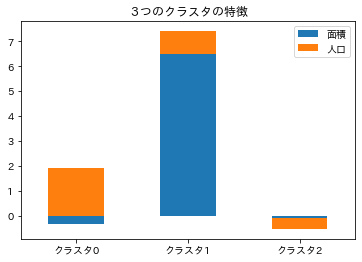

In [23]:
# 可視化（積み上げ棒グラフ）
cust_array = np.array([dx,dy]).T
df_raw['クラスタ']=df['クラスタ']=km.fit_predict(cust_array)

clusterinfo = pd.DataFrame()
for i in range(3):
    clusterinfo['クラスタ' + str(i)] = df[df['クラスタ'] == i].mean()
clusterinfo = clusterinfo.drop('クラスタ')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="３つのクラスタの特徴")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

クラスタ０は、人口と面積とでは人口の大きさが特徴であるということがわかります。クラスタ１、つまり北海道は面積が特徴で、人口もクラスタ0ほどではないけれど、クラスタ２の各県より多い、という特徴があることがわかります。クラスタ２は人口が平均より－であるというのが特徴だということがわかります。




最後に、クラスタ判定の結果を表にして清書しておきます。

In [24]:
df_raw

,人口,面積,人口密度,クラスタ
都道府県,,,,
北海道,5228885,78421,67,1
青森県,1238730,9646,128,2
岩手県,1211206,15275,79,2
宮城県,2303487,7282,316,2
秋田県,960113,11638,83,2
山形県,1068696,9323,115,2
福島県,1834198,13784,133,2
茨城県,2868554,6097,470,2
栃木県,1934016,6408,302,2
